<a href="https://colab.research.google.com/github/Prasham94/crowd_funding/blob/main/RFR%20(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


Random Forest Mean Squared Error: 13.203495892995978


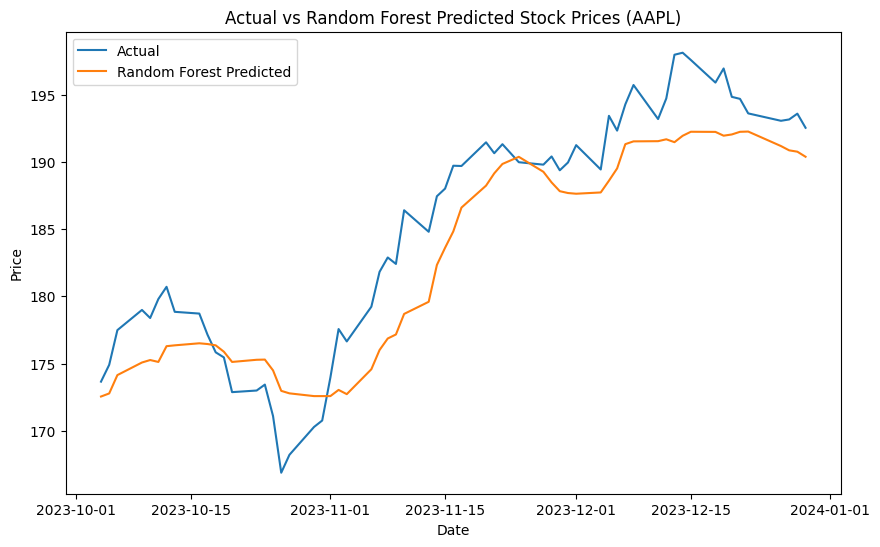

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import yfinance as yf

# Fetch historical stock prices for AAPL from Yahoo Finance
data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data.index)

# Fill missing values in 'Close' column with the previous day's value
data['Close'] = data['Close'].ffill()

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_26'] = data['Close'].ewm(span=26, min_periods=0, adjust=False).mean()  # 26-day Exponential Moving Average
data['EMA_12'] = data['Close'].ewm(span=12, min_periods=0, adjust=False).mean()  # 12-day Exponential Moving Average
data['MACD'] = data['EMA_12'] - data['EMA_26']  # Moving Average Convergence Divergence

# Drop rows with NaN values after feature engineering
data.dropna(inplace=True)

# Define features and target variable
features = ['SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD']
target = 'Close'
X = data[features]
y = data[target]

# Split data into train and test sets
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)
rf_predictions = rf_regressor.predict(X_test_scaled)


# Calculate Mean Squared Error for Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)

print('Random Forest Mean Squared Error:', rf_mse)

# Visualize actual vs predicted for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size:], y_test, label='Actual')
plt.plot(data.index[train_size:], rf_predictions, label='Random Forest Predicted')
plt.title('Actual vs Random Forest Predicted Stock Prices (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()